# Logistic Regression with Multiple Features

You will find this tutorial series much better if you follow along [This](https://www.coursera.org/learn/machine-learning) course. It's free and has very good explantion of algos. My series will be only about it's implementation in Python.

I repeat **Concepts and Algos** will **not** be taught in this series

# Importing Required Modules

Check out the 1st part of this seeries in this repository for this prerequisites for this course

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets


# Logistic Regression 3 - Class Classifier


Show below is a logistic-regression classifiers decision boundaries on the
first two dimensions (sepal length and width) of the 
[Iris Flower Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) dataset. 

This is a better visualization from [Kaggle](https://www.kaggle.com/arshid/iris-flower-dataset) 

The datapoints
are colored according to their labels.




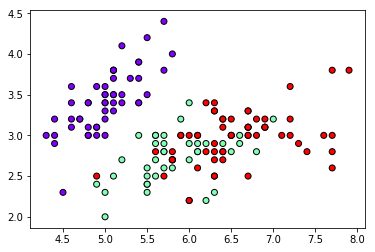

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target[:]

plt.scatter(X[:, 0], X[:, 1], c = Y, cmap=plt.cm.rainbow, edgecolors='k')

# Training the Model

[Doc Link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) for info on solver and multi classes. 

Check them out before proceeding

In [3]:
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='ovr')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)



LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

# Plotting to Visualize

## Making the data to a Mesh 

In [4]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5    
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))    # Mesh Creation

## Predicting

In [5]:
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Plotting

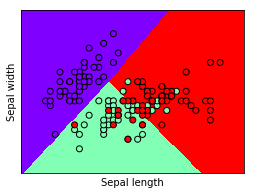

In [6]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.rainbow)

plt.scatter(X[:, 0], X[:, 1], c = Y, cmap=plt.cm.rainbow, edgecolors='k')   # Check out the docs for scatter plot to understand
plt.xlabel('Sepal length')                                                  # cmap are colour maps
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# Accuracy


In [7]:
logreg.score(X, Y)

0.8066666666666666



Not a really good score but for the iris data set, a pretty good one